#### Transfer learning in a simple MLP network

In [1]:
# automatically reload edited modules
%load_ext autoreload
%autoreload 2

In [2]:
import tensorflow as tf
import numpy as np
import pylab as pl
from copy import deepcopy
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style()
jtplot.style(context='notebook', fscale=1.4, spines=False, gridlines='--')
jtplot.style(ticks=False, grid=False, figsize=(6, 4.5))

In [4]:
# import class Model
from model import Model

In [5]:
# mnist imshow convenience function
def mnist_imshow(img):
    plt.imshow(img.reshape([28,28]), cmap="inferno")
    plt.axis('off')

# return a new mnist dataset w/ pixels randomly permuted
def permute_mnist(mnist):
    perm_inds = np.arange(mnist.train.images.shape[1])
    np.random.shuffle(perm_inds)
    mnist2 = deepcopy(mnist)
    sets = ["train", "validation", "test"]
    for set_name in sets:
        this_set = getattr(mnist2, set_name) # shallow copy
        this_set._images = np.transpose(np.array([this_set.images[:,c] for c in perm_inds]))
    return mnist2

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


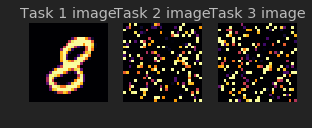

In [6]:
# original mnist for 1st task
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)
# permuting mnist for 2nd task
mnist2 = permute_mnist(mnist)
# permuting mnist for 3rd task
mnist3 = permute_mnist(mnist)

plt.subplot(1,3,1)
mnist_imshow(mnist.train.images[5])
plt.title("Task 1 image")
plt.subplot(1,3,2)
mnist_imshow(mnist2.train.images[5])
plt.title("Task 2 image");
plt.subplot(1,3,3)
mnist_imshow(mnist3.train.images[5])
plt.title("Task 3 image");

In [7]:
# initialize model
sess = tf.InteractiveSession()
x = tf.placeholder(tf.float32, shape=[None, 784])
y_ = tf.placeholder(tf.float32, shape=[None, 10])
model = Model(x, y_)
sess.run(tf.global_variables_initializer())

#### Train on task A, test on task A

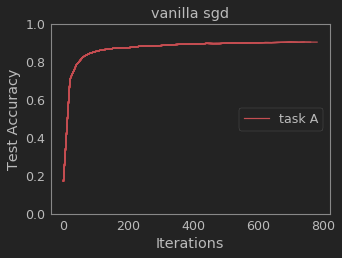

In [8]:
# training 1st task
model.train_task(sess, 800, 20, mnist, [mnist], x, y_, lams=[0])
# save current optimal weights
model.star()

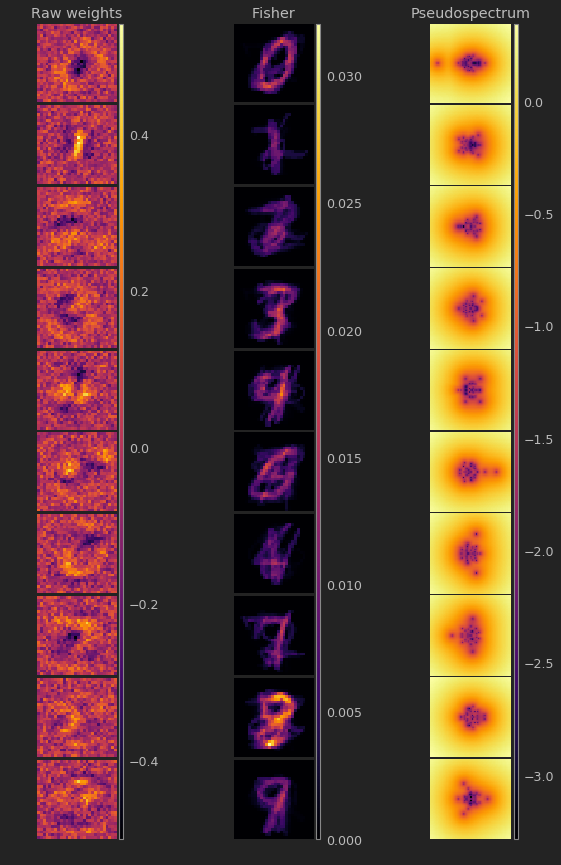

In [9]:
# visualize 1st task
# fisher information
model.compute_fisher(mnist.validation.images, sess, num_samples=200, plot_diffs=False)
# pseudo-spectra
model.compute_svd(0, 64)
model.visualize(0)

#### Train on task B, test on tasks A and B

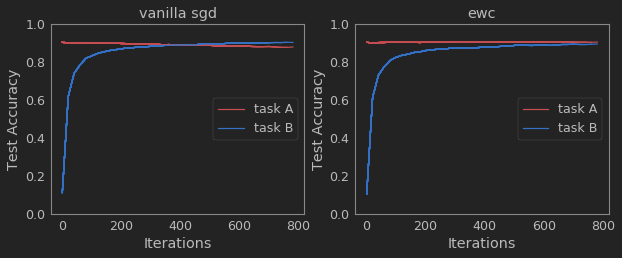

In [10]:
# training 2nd task
model.train_task(sess, 800, 20, mnist2, [mnist, mnist2], x, y_, lams=[0, 15])
# save current optimal weights
model.star()

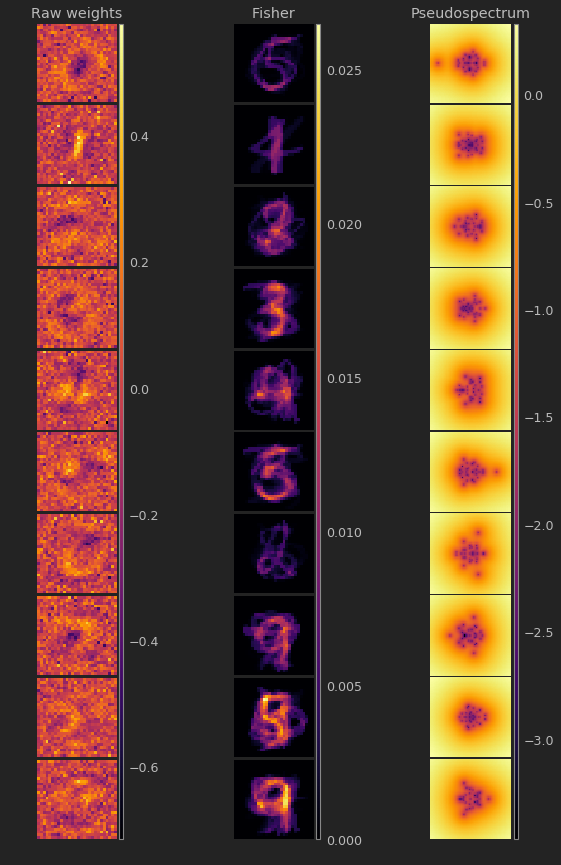

In [11]:
# visualize 1st task
# fisher information
model.compute_fisher(mnist.validation.images, sess, num_samples=200, plot_diffs=False)
# pseudo-spectra
model.compute_svd(0, 64)
model.visualize(0)

/usr/lib/python3.6/site-packages/matplotlib/colors.py:860: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin


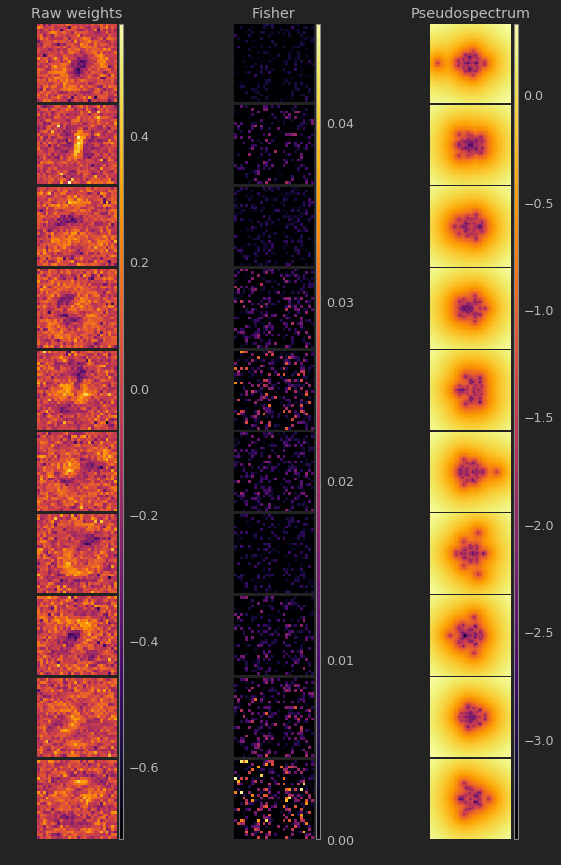

In [12]:
# visualize 2nd task
# fisher information
model.compute_fisher(mnist2.validation.images, sess, num_samples=200, plot_diffs=False)
# pseudo-spectra
model.compute_svd(0, 64)
model.visualize(0)

#### Train on task C, test on tasks A, B, and C

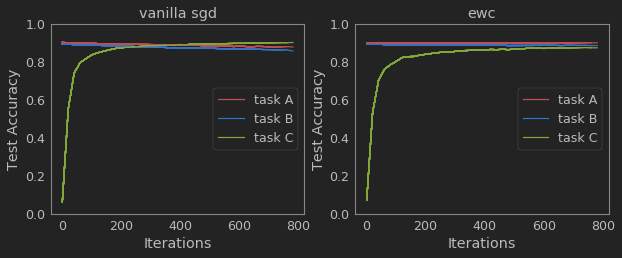

In [13]:
# training 3rd task
model.train_task(sess, 800, 20, mnist3, [mnist, mnist2, mnist3], x, y_, lams=[0, 15])